Data Mining: Basic Concepts - WS'21/22
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Prof. Dr. Daniel Keim, Eren Cakmak, Fabian Sperrle
```
__Organize in teams of 2 people, return the exercise by Thu, Nov 11th, 2021 (11:59 PM) using ILIAS__

---

Assignment 02 in Python
---------------
- ___Please put your names and student IDs here___:
    - Viet Ha, 01/1143223
    - Zheng Zhou 01/770880

---

#### Exercise 1: Data Types
Imagine you have the following dataset:

| Name 	| Gender   	| Economic status  	| Education        	|Annual income 	|
|------	|----------	|------------------	|------------------	|--------------	|
|Bob   	|Male      	| Low              	|  High School     	| 34 000       	|
|Alice 	|Female    	| Medium           	|  Master          	| 42 000       	|
|Lisa  	|Female    	| High             	|  Bachelor        	| 58 000       	|

##### __(a) Describe for each column whether it contains nominal, ordinal or numerical data and explain why you made that decision__

```
Name: nominal - no order comparison between names, cannot do algebraic operations
Gender: nominal - no order comparison between gender, cannot do algebraic operations
Economic status: ordinal - can order the data, cannot do algebraic operations
Education: ordinal - can order the data, cannot do algebraic operations
Annual income: numerical - ordinal - can order the data and do algebraic operations
```

##### __(b) Give at least one mathematical operation that can be used on all three data types__

```
equality comparison
```

---

#### Exercise 2: Missing Values

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [18]:
df = pd.read_csv('data_exercise2.csv')
df.iloc[40:45,:]

,x,y
40,0.424242,9.568551
41,0.484848,NaN
42,0.545455,9.244929
43,0.606061,9.056404
44,0.666667,8.851852


##### __(a) Fill in the missing values using the attribute mean. Plot the result using the ``seaborn.scatterplot``method.__ 

In [13]:
df1 = df.fillna(df.loc[:,'y'].mean())
df1.iloc[40:45,:]

,x,y
40,0.424242,9.568551
41,0.484848,4.390449
42,0.545455,9.244929
43,0.606061,9.056404
44,0.666667,8.851852


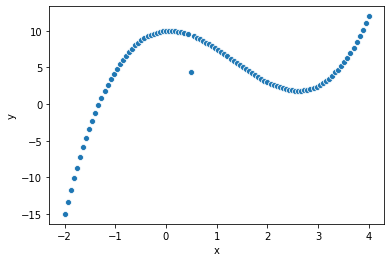

In [17]:
sns.scatterplot(data=df1, x='x', y='y')

##### __(b) Instead of filling the missing values with the mean, we will now try to fill them using regression.__
##### __What polynomial degree does the function you are looking for most likely have?__ _(Hint: Use the ``seaborn.regplot`` method and modify the ``order`` parameter)_

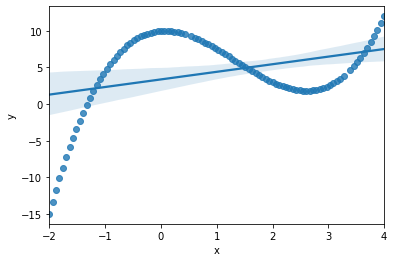

In [20]:
# order=1, the regression line does not fit the data well
sns.regplot(x='x', y='y', data=df, order=1)

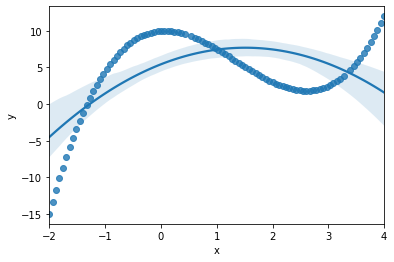

In [21]:
# order=2, the regression curve does not fit the data well
sns.regplot(x='x', y='y', data=df, order=2)

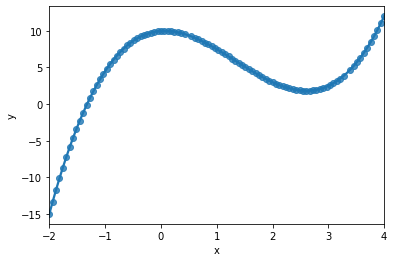

In [22]:
# order=3, the regression curve fits the data well (almost perfect)
# the most likely polynomial degree of regression function is 3
sns.regplot(x='x', y='y', data=df, order=3)

##### __(c) Compute the coefficients for the function that describes the data__ _(Hint: drop missing values and use ``numpy.polyfit()``)_

In [44]:
df2 = df.dropna()
df2.iloc[40:45,:]

,x,y
40,0.424242,9.568551
42,0.545455,9.244929
43,0.606061,9.056404
44,0.666667,8.851852
45,0.727273,8.632607


In [45]:
z = np.polyfit(df2.x, df2.y, 3)
z

array([ 1. , -4. ,  0.5, 10. ])

##### __(d) Use the computed polynomial coefficients to implement a regression method. Use the method to fill the missing values in the dataframe with values.__

In [46]:
na = df[df['y'].isna()]
na

,x,y
41,0.484848,NaN
88,3.333333,NaN


In [52]:
x1 = na.iloc[0, 0]
x2 = na.iloc[1, 0]
x1, x2

(0.4848484848484849, 3.333333333333334)

In [66]:
reg = np.poly1d(z)
df3 = df
df3.at[41, 'y'] = reg(x1)
df3.at[88, 'y'] = reg(x2)
df3.at[88, 'y']

4.25925925925926

##### __(f) Plot your both result (mean and polynomial regression) and compare the results. Explain which values you think fit the data better and why.__

In [71]:
mean = df.loc[:,'y'].mean()
mean

4.4393939393939394

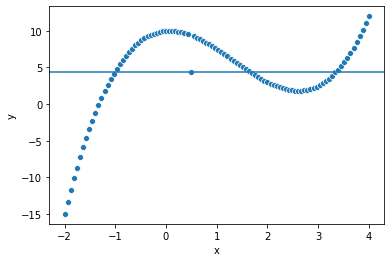

In [72]:
# mean regression
g = sns.scatterplot(data=df1, x='x', y='y')
g.axhline(mean)

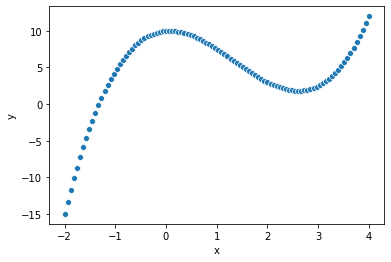

In [65]:
# polynomial regression
sns.scatterplot(data=df3, x='x', y='y')

The polynomial regression fits the data better, because it adjusts the missing value while varying x, instead of filling all x with the same mean lying on a horizontal line. The data may be derived from a 3-degree polynomial, so we can observe the mean filling fails in case of x = 0.484848.

---

#### Exercise 3: Data Cleaning
Clean the following cereal dataset containing nutrition data on 80 cereal products. The commands have to work for different datasets as well. 

Careful: If you like to eat cereal, do yourself a favor and do not look at the numbers. After seeing these data it will never be the same to eat Fruity Pebbles again.

In [34]:
import pandas as pd
df = pd.read_csv('cereal.csv')
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating;;
0,100% Bran,N,C,70.0,4.0,1,130.0,10.0,5.0,6,280.0,25.0,3,1.0,0.33,68.402973;;
1,100% Natural Bran,Q,C,120.0,3.0,5,15.0,2.0,8.0,8,135.0,0.0,3,1.0,1.00,33.983679;;
2,All-Bran,K,C,70.0,4.0,1,260.0,9.0,7.0,5,320.0,25.0,3,1.0,0.33,59.425505;;
3,All-Bran with Extra Fiber,K,C,50.0,4.0,0,140.0,14.0,8.0,0,330.0,25.0,3,1.0,0.50,93.704912;;
4,Almond Delight,R,C,110.0,2.0,2,200.0,1.0,14.0,8,-1.0,25.0,3,1.0,0.75,34.384843;;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110.0,2.0,1,250.0,0.0,21.0,3,60.0,25.0,3,1.0,0.75,39.106174;;
73,Trix,G,C,110.0,1.0,1,140.0,0.0,13.0,12,25.0,25.0,2,1.0,1.00,27.753301;;
74,Wheat Chex,R,C,100.0,3.0,1,NaN,3.0,17.0,3,115.0,25.0,1,1.0,0.67,49.787445;;
75,Wheaties,G,C,100.0,3.0,1,200.0,3.0,17.0,3,110.0,25.0,1,1.0,1.00,51.592193;;


##### __(a) Are there columns with missing values?__

In [35]:
df.isnull().values.any()

True

In [36]:
df[df.isnull().values == True]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating;;
14,Cocoa Puffs,G,C,110.0,NaN,1,180.0,0.0,12.0,13,NaN,25.0,2,1.0,1.00,22.736446;;
14,Cocoa Puffs,G,C,110.0,NaN,1,180.0,0.0,12.0,13,NaN,25.0,2,1.0,1.00,22.736446;;
23,Double Chex,R,C,100.0,2.0,0,190.0,1.0,18.0,5,80.0,NaN,3,1.0,NaN,44.330856;;
23,Double Chex,R,C,100.0,2.0,0,190.0,1.0,18.0,5,80.0,NaN,3,1.0,NaN,44.330856;;
29,Fruity Pebbles,P,C,110.0,1.0,1,135.0,0.0,13.0,12,NaN,25.0,2,1.0,0.75,28.025765;;
46,Mueslix Crispy Blend,K,C,NaN,3.0,2,150.0,3.0,NaN,13,160.0,25.0,3,1.5,0.67,30.313351;;
46,Mueslix Crispy Blend,K,C,NaN,3.0,2,150.0,3.0,NaN,13,160.0,25.0,3,1.5,0.67,30.313351;;
64,Shredded Wheat 'n'Bran,N,C,90.0,3.0,0,0.0,4.0,NaN,0,NaN,0.0,1,1.0,NaN,74.472949;;
64,Shredded Wheat 'n'Bran,N,C,90.0,3.0,0,0.0,4.0,NaN,0,NaN,0.0,1,1.0,NaN,74.472949;;
64,Shredded Wheat 'n'Bran,N,C,90.0,3.0,0,0.0,4.0,NaN,0,NaN,0.0,1,1.0,NaN,74.472949;;


##### __(b) Drop all rows that have at least two `NaN` values.__

In [39]:
df_na = df[df.isna().values == True]
drop_ids = set(())
for i in df_na.index:
    if df.iloc[i].isna().sum() >= 2:
        drop_ids.add(i)
df1 = df.drop(drop_ids)

##### __(c) Replace the `NaN` values of remaining columns with missing values using linear interpolation.__

In [44]:
df2 = df1.interpolate()
df2.isnull().values.any()

False

---

#### Exercise 4: Binning
The following data consists of the age of several people: 
```
> [13, 15, 16, 17, 19, 20, 21, 21, 22, 22, 25, 25, 26, 26, 30, 33, 33, 35, 35, 35, 35, 36, 40, 42, 46, 53, 70]

```

##### __(a) Apply binning to the dataset using 3 equal-width bins. Smooth the data using the mean of the bins. Explain the steps of your approach and give the final result.__
##### __Please solve this exercise by hand without using Python__ 

```
Step 1: Sort the data to get a sorted list with 27 elements
[13, 15, 16, 17, 19, 20, 21, 21, 22, 22, 25, 25, 26, 26, 30, 33, 33, 35, 35, 35, 35, 36, 40, 42, 46, 53, 70]
Step 2: Split the sorted list into 3 bins: intervals of 19 width [ =(70-13)/3]
        [13, 32] bin 1: [13, 15, 16, 17, 19, 20, 21, 21, 22, 22, 25, 25, 26, 26, 30]
        (32, 51] bin 2: [33, 33, 35, 35, 35, 35, 36, 40, 42, 46]
        (51, 70] bin 3: [53, 70]
Step 3: Smoothing by bin means.
    Bin 1: [21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2]
    Bin 2: [37, 37, 37, 37, 37, 37, 37, 37, 37, 37]
    Bin 3: [61.5, 61.5]
```

##### __(b) Apply binning to the dataset using 3 equal-depth bins. Smooth the data using the mean of the bins. Explain the steps of your approach and give the final result.__
##### __Please solve this exercise by hand without using Python__ 

```
Step 1: Sort the data to get a sorted list with 27 elements
[13, 15, 16, 17, 19, 20, 21, 21, 22, 22, 25, 25, 26, 26, 30, 33, 33, 35, 35, 35, 35, 36, 40, 42, 46, 53, 70]
Step 2: Split the sorted list into 3 bins with 9 [ =27/3] elements each
        bin 1: [13, 15, 16, 17, 19, 20, 21, 21, 22]
        bin 2: [22, 25, 25, 26, 26, 30, 33, 33, 35]
        bin 3: [35, 35, 35, 36, 40, 42, 46, 53, 70]
Step 3: Smoothing by bin means.
    Bin 1: [18.222, 18.222, 18.222, 18.222, 18.222, 18.222, 18.222, 18.222, 18.222]
    Bin 2: [28.333, 28.333, 28.333, 28.333, 28.333, 28.333, 28.333, 28.333, 28.333]
    Bin 3: [43.555, 43.555, 43.555, 43.555, 43.555, 43.555, 43.555, 43.555, 43.555]
```

##### __(c) Compare the results from a) and b). Give one reason why equal-depth binning might be preferable in this scenario.__

```
Steps of means between bin 2 and bin 3 are larger in case of using 3 equal-width. This is undesirable because bin 3 are dominated by large numbers. The 3 equal-depth binning handles the skewed data better than 3 equal-width binning, so might be preferable in this scenario.
```

---

#### Exercise 4: Normalization

##### __(a) Which of the columns in the following table can be normalized using the linear or logarithmic min-max normalization? Discuss if the normalization is useful or not.__

|id |Gender|Size (cm)|Weight (kg)|Hair Color|Blood Type|Glasses|
|---|------|---------|-----------|----------|----------|-------|
|22|Female|175|65|red|A|yes|
|23|Female|176|71|red|AB|yes|
|24|Female|176|71|red|O|yes|
|25|Female|179|69|black|B|yes|
|26|Female|195|62|black|B|no|
|27|Female|203|64|black|O|yes|
|28|Female|165|70|brown|AB|no|
|29|Female|172|62|brown|AB|no|
|30|Female|166|52|brown|AB|no|
|31|Female|182|67|brown|AB|no|
|32|Female|168|70|brown|O|yes|
|33|Female|168|59|blond|B|no|
|34|Male|168|62|black|B|no|
|35|Male|178|63|red|B|no|
|36|Male|178|59|red|AB|no|
|37|Male|172|67|brown|A|yes|
|38|Male|172|58|brown|A|no|
|39|Male|185|62|brown|A|no|
|40|Male|190|72|black|B|yes|
|41|Male|184|70|black|B|yes|

```
Columns Size and Weight can be normalized using the linear or logarithmic min-max normalization. The normalization for column Size is not very useful, because it does not handle the extreme values (such as 203, 195, 166, 165) well. It is useful for column Weight as the column does not contain many extreme values. 
```

##### __(b) Using the column “Size”, use linear min-max normalization to transform the values ``166, 180, 191`` into the range ``[0, 1]``. Give the formula used to compute the values, including min/max value.__

```
min=165, max=203 
lin_norm(166)=(166-165)/(203-165)=0.0263
lin_norm(180)=(180-165)/(203-165)=0.3947
lin_norm(191)=(191-165)/(203-165)=0.6842
```

##### __(c) Using the column “Weight”, use logarithmic min-max normalization to transform the values ``58, 65, 69`` into the range ``[0, 1]``. Give the formula used to compute the values, in-cluding min/max value__

```
min=52, max=72
ln_norm(58)=(ln58-ln52)/(ln72-ln52)=0.3355
ln_norm(65)=(ln65-ln52)/(ln72-ln52)=0.6857
ln_norm(69)=(ln69-ln52)/(ln72-ln52)=0.8692
```

##### __(d) Write a function to normalize all columns of the following dataframe using the linear min-max normalization.__

In [71]:
import pandas as pd
df_nom = pd.DataFrame(list(zip(range(0, 100) , range(750, 850), range(11122, 11222))), 
               columns =['a', 'b', 'c'])
df_nom

,a,b,c
0,0,750,11122
1,1,751,11123
2,2,752,11124
3,3,753,11125
4,4,754,11126
...,...,...,...
95,95,845,11217
96,96,846,11218
97,97,847,11219
98,98,848,11220


In [73]:
for i in df_nom.index:
    v = df_nom.iloc[i,:]
    df_nom.iloc[i,:] = (v-df_nom.min())/(df_nom.max()-df_nom.min())
df_nom

,a,b,c
0,0.000000,0.000000,0.000000
1,0.010101,0.884570,0.991266
2,0.020202,0.885748,0.991355
3,0.030303,0.886926,0.991445
4,0.040404,0.888104,0.991534
...,...,...,...
95,0.959596,0.995289,0.999644
96,0.969697,0.996466,0.999733
97,0.979798,0.997644,0.999822
98,0.989899,0.998822,0.999911
